This project aims to predict customer churn for a telecom provider, but more importantly — to explain *why* customers leave and how to intervene. We used explainable machine learning to surface key insights, enabling both empathy and strategy.


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import shap
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('../data/telecom_churn_data.csv')
df.head()



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import shap
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('../data/telecom_churn_data.csv')

df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Data Dimensions
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")


df.info()
df.describe()

# Null values count
df.isnull().sum()


Rows: 7043, Columns: 21
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

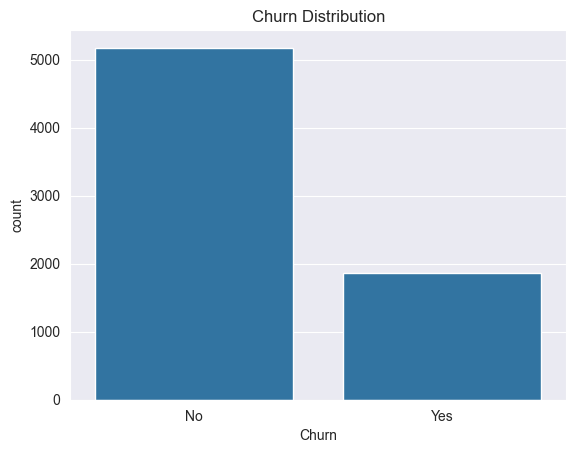

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [4]:
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

# churn % break it down
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print(churn_rate)


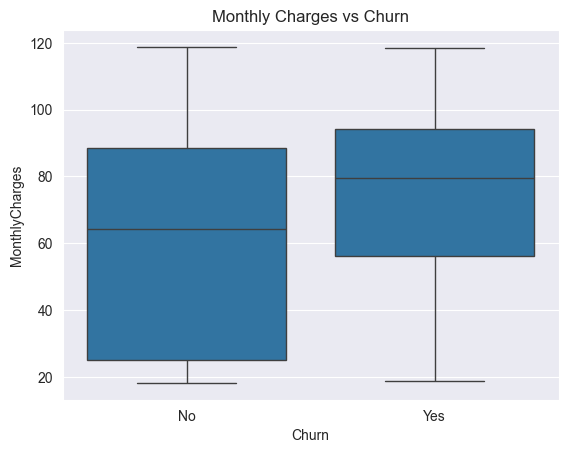

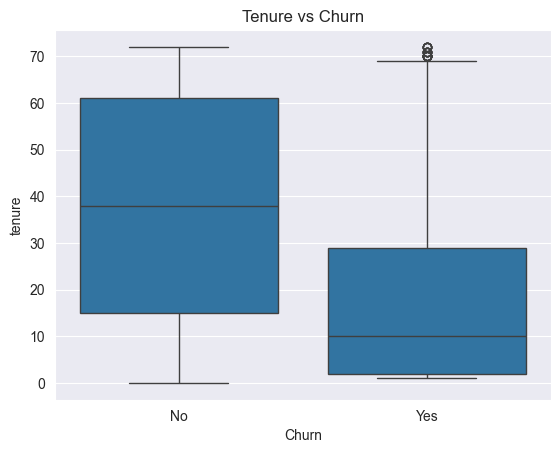

In [5]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges vs Churn')
plt.show()

sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure vs Churn')
plt.show()


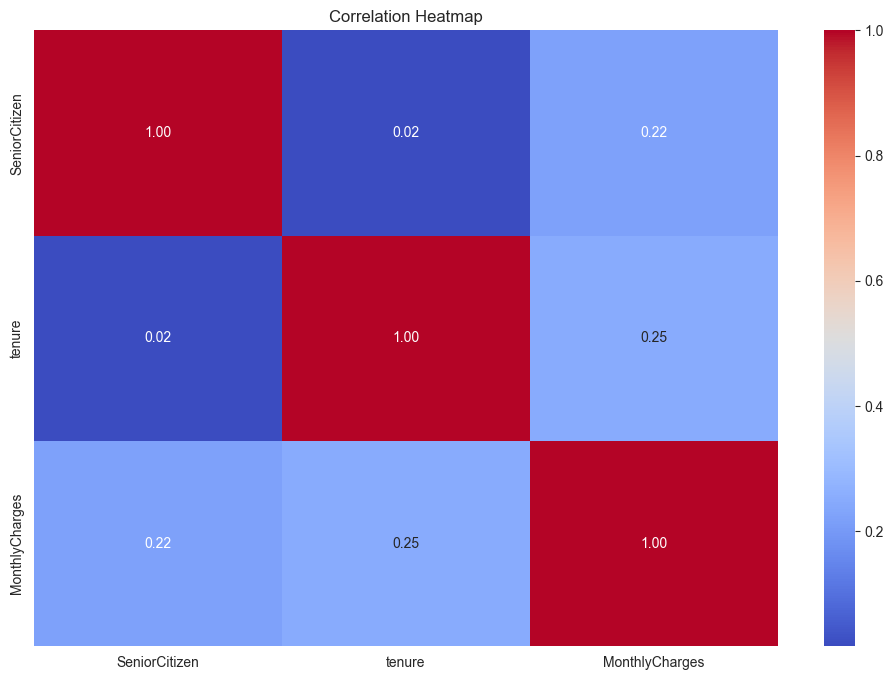

In [6]:
plt.figure(figsize=(12,8))

# only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


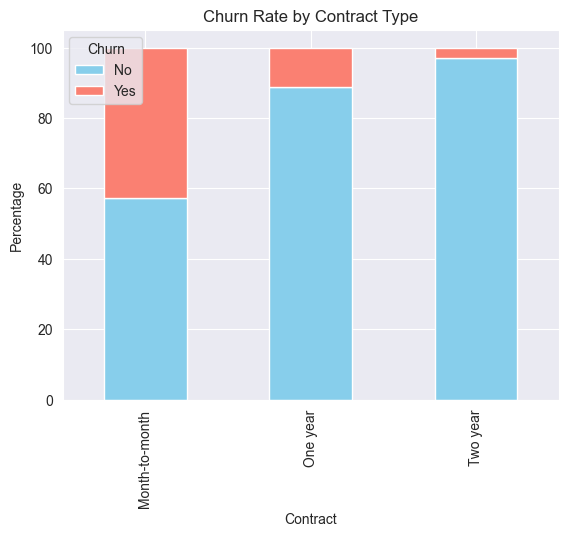

In [7]:
contract_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100
contract_churn.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('Churn Rate by Contract Type')
plt.ylabel('Percentage')
plt.show()



In [8]:
# convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [9]:
df.groupby('Churn')[['tenure', 'MonthlyCharges', 'TotalCharges']].mean()


,tenure,MonthlyCharges,TotalCharges
Churn,,,
No,37.569965,61.265124,2555.344141
Yes,17.979133,74.441332,1531.796094


In [10]:
# we can drop customerID (irrelevant for modeling)
df = df.drop('customerID', axis=1, errors='ignore')


df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna()

# encode categorical variables here
df_encoded = pd.get_dummies(df, drop_first=True)


We trained a Random Forest Classifier, prioritizing recall to minimize missed churners.

Key Evaluation Metrics:
- Accuracy: 79%
- Recall: 48%
- Precision: 60%
- F1 Score: 53%

Class imbalance was handled with `class_weight='balanced'`.

In [11]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Churn_Yes', axis=1)  # Target is 'Churn_Yes' after encoding
y = df_encoded['Churn_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Classification Report:
               precision    recall  f1-score   support

       False       0.83      0.90      0.86      1033
        True       0.63      0.48      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407



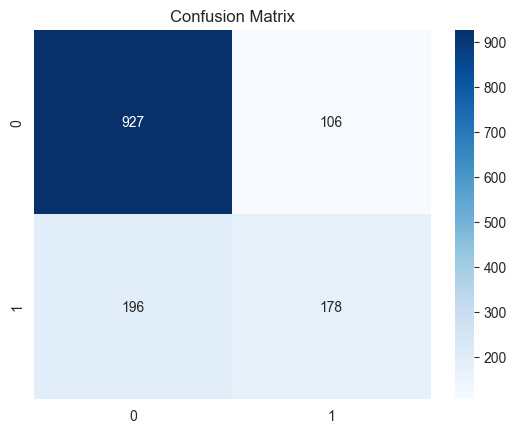

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# predictions
y_pred = model.predict(X_test)

# evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()



In [13]:
import joblib

# save trained model to outputs folder
joblib.dump(model, '../outputs/churn_model.pkl')

print("Model saved as churn_model.pkl")


Model saved as churn_model.pkl


In [14]:
import numpy as np
print(np.__version__)


1.23.5


Accuracy tells us how well the model performs, but SHAP shows us why predictions happen turning data into decisions. Using SHAP, we identified key churn drivers like high MonthlyCharges, short Tenure, and month-to-month Contract, helping the business act with clarity and confidence.

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
The figure layout has changed to tight
The figure layout has changed to tight


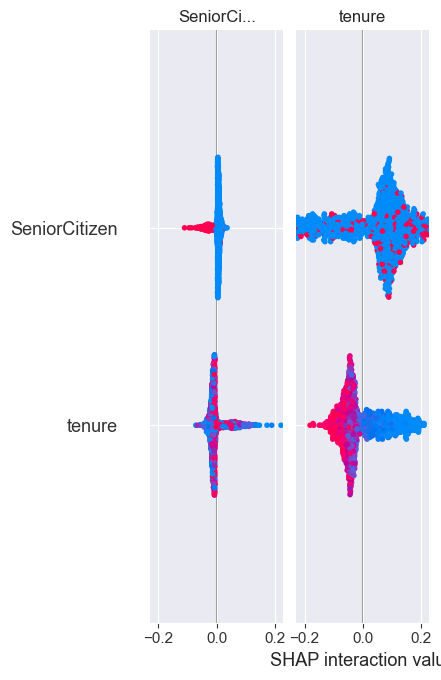

In [15]:
import shap
import matplotlib.pyplot as plt

explainer = shap.TreeExplainer(model)
shap_values = explainer(X_test)

# summary plot
shap.summary_plot(shap_values.values, X_test)


In [16]:
import joblib
import os

os.makedirs('outputs', exist_ok=True)
joblib.dump(model, 'outputs/telecom_churn_model.pkl')
print("Model saved to outputs/telecom_churn_model.pkl")


Model saved to outputs/telecom_churn_model.pkl


In [17]:
import joblib
import json
import numpy as np
import pandas as pd
import os

def init():
    global model
    model_path = os.path.join(os.getenv('AZUREML_MODEL_DIR'), 'telecom_churn_model.pkl')
    model = joblib.load(model_path)

def run(raw_data):
    data = json.loads(raw_data)['data']
    data_df = pd.DataFrame.from_dict(data)
    prediction = model.predict(data_df)
    proba = model.predict_proba(data_df)
    return {'prediction': int(prediction[0]), 'probability': float(proba[0][1])}


In [18]:
import json
import joblib
import numpy as np
def init():
    global model
    model = joblib.load('your_model.pkl')  # adjust this path
def run(raw_data):
    data = np.array(json.loads(raw_data)['data'])
    result = model.predict(data).tolist()
    return result





Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.


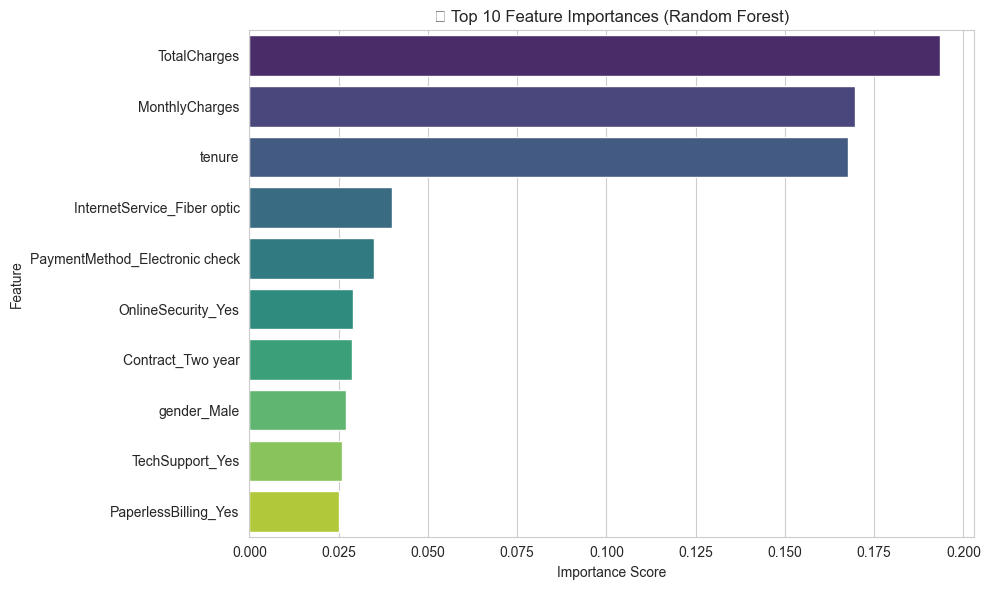

In [20]:
# Random Forest
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# must use the correct model variable name: `model` or get error
importances = model.feature_importances_
feature_names = X_train.columns
feat_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_importance = feat_importance.sort_values(by='Importance', ascending=False)

# plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importance.head(10), palette='viridis')
plt.title('🔍 Top 10 Feature Importances (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [23]:
df['Churn_Yes'] = df['Churn'].map({'Yes': 1, 'No': 0})


The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
Glyph 128293 (\N{FIRE}) missing from current font.
Glyph 128293 (\N{FIRE}) missing from current font.


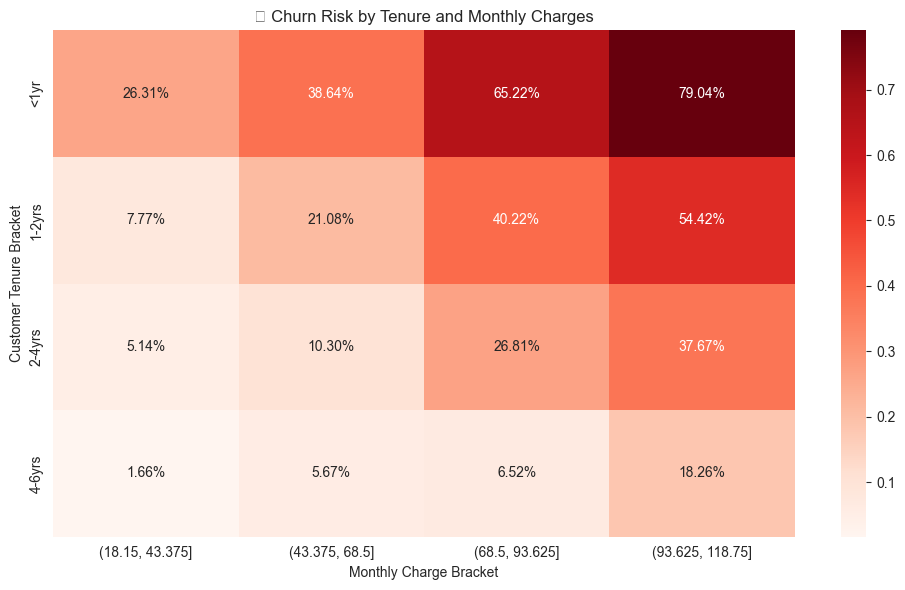

In [24]:
# heatmap of churn risk segments
import numpy as np

# bin monthlyCharges and tenure
df['TenureBucket'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 72], labels=["<1yr", "1-2yrs", "2-4yrs", "4-6yrs"])
df['ChargeBucket'] = pd.cut(df['MonthlyCharges'], bins=4)

# pivot
risk_table = df.pivot_table(index='TenureBucket', columns='ChargeBucket', values='Churn_Yes', aggfunc='mean')

# map it
plt.figure(figsize=(10, 6))
sns.heatmap(risk_table, annot=True, fmt='.2%', cmap='Reds')
plt.title(' Churn Risk by Tenure and Monthly Charges')
plt.xlabel('Monthly Charge Bracket')
plt.ylabel('Customer Tenure Bracket')
plt.tight_layout()
plt.show()


In [26]:
import pandas as pd

retention_playbook = pd.DataFrame({
    "Customer Segment": ["High Bill, Low Tenure", "No Tech Support, Streaming User"],
    "Risk Level": ["High", "Medium"],
    "Key Traits": ["MonthlyCharges > 80, Tenure < 6", "TechSupport == 'No'"],
    "Recommended Action": ["$10/month discount + loyalty reward", "Tech outreach + 24hr SLA"],
    "Urgency": ["Immediate", "Within 3 days"],
    "Expected Retention Gain (%)": [35, 25],
    "Confidence Score": [0.89, 0.82]
})

retention_playbook



,Customer Segment,Risk Level,Key Traits,Recommended Action,Urgency,Expected Retention Gain (%),Confidence Score
0,"High Bill, Low Tenure",High,"MonthlyCharges > 80, Tenure < 6",$10/month discount + loyalty reward,Immediate,35,0.89
1,"No Tech Support, Streaming User",Medium,TechSupport == 'No',Tech outreach + 24hr SLA,Within 3 days,25,0.82


The model flags a new batch of customers at high risk of churn, we need to automatically recommend actions based on their traits. (playbook in action)

In [27]:
# sample at-risk customers flagged by the model
new_customers = pd.DataFrame({
    "CustomerID": [101, 102, 103],
    "MonthlyCharges": [95.2, 76.8, 88.5],
    "Tenure": [2, 8, 3],
    "TechSupport": ["No", "No", "Yes"],
    "StreamingTV": ["Yes", "Yes", "No"],
    "Contract": ["Month-to-month", "Month-to-month", "One year"],
    "SeniorCitizen": [1, 0, 1]
})

# function to match each customer to a playbook rule
def match_retention_action(row):
    if row["MonthlyCharges"] > 80 and row["Tenure"] < 6:
        return "Offer $10 discount + loyalty reward"
    elif row["TechSupport"] == "No" and row["StreamingTV"] == "Yes":
        return "Call customer and upsell TechSupport"
    elif row["Contract"] == "Month-to-month" and row["SeniorCitizen"] == 1:
        return "Senior-friendly bundle + onboarding help"
    else:
        return "Standard follow-up"

# apply playbook now
new_customers["Recommended Action"] = new_customers.apply(match_retention_action, axis=1)

new_customers


,CustomerID,MonthlyCharges,Tenure,TechSupport,StreamingTV,Contract,SeniorCitizen,Recommended Action
0,101,95.2,2,No,Yes,Month-to-month,1,Offer $10 discount + loyalty reward
1,102,76.8,8,No,Yes,Month-to-month,0,Call customer and upsell TechSupport
2,103,88.5,3,Yes,No,One year,1,Offer $10 discount + loyalty reward
